In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from clean_data import clean_text
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import time
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Adjust the path to the project root (assuming the notebook is two levels deep in the folder structure)
project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))

# Add the project root to the Python path
sys.path.append(project_root)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MCA01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MCA01\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Carregar e Pré-processar o Dataset

In [2]:
# Carregar o dataset
csv_path = os.path.abspath(os.path.join(current_dir, '..', '..', 'datasets', 'trainEN.csv'))

df = pd.read_csv(csv_path)
# Combinar colunas de título e texto
df['combined_text'] = df['title'] + " " + df['text']
df['clean_text'] = df['combined_text'].apply(clean_text)
df.head()

,id,title,author,text,label,combined_text,clean_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,house dem aide didnt even see comeys letter ja...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",flynn hillary clinton big woman campus breitba...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...,truth might get fired truth might get fired oc...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,15 civilian killed single u airstrike identifi...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,iranian woman jailed fictional unpublished sto...


## Vetorização dos Textos

In [3]:
from sklearn.decomposition import TruncatedSVD
# Assuming df['clean_text'] is your text data and df['label'] is your labels
# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['label']

# Apply TruncatedSVD
pca = TruncatedSVD(n_components=75)
X_pca = pca.fit_transform(X)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

In [5]:
# Initialize and train the SVM
clf = SVC(C=109.911, gamma=5.001, kernel='rbf')
clf.fit(X_scaled, y)

In [6]:
# Prediction and evaluation
y_pred = clf.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print(f'Precisao do modelo: {accuracy:.2f}')

# Classification report
print(classification_report(y, y_pred))

# Define the k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

X_Train_embedded = TSNE(n_components=2).fit_transform(X)
print(X_Train_embedded.shape)


In [88]:
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC

# Initialize the SVC model and the PCA transformer
clf = SVC(C=19.0011, gamma=1.50001, kernel='rbf')
pca = TruncatedSVD(n_components=85)

# Transform the training data
X_train2 = pca.fit_transform(X_train_vectorized)

# Transform the test data
X_test2 = pca.transform(X_test_vectorized)

# Fit the model on the transformed training data
clf.fit(X_train2, y_train)

# Score the model on the transformed test data
score = clf.score(X_test2, y_test)
print("Model accuracy:", score)

Model accuracy: 0.9540495867768595


(14116, 2)


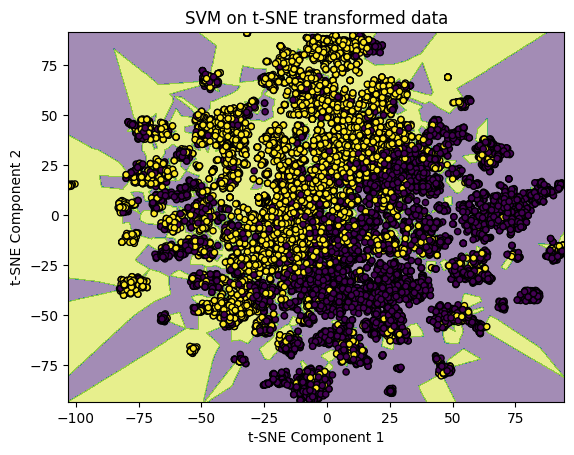

In [89]:
# Apply t-SNE for visualization
X_Train_embedded = TSNE(n_components=2).fit_transform(X_train2)
print(X_Train_embedded.shape)

# Predict using the trained model
y_predicted = clf.predict(X_train2)

# Plot decision regions using 1-NN on the t-SNE transformed data
h = .02  # mesh step
resolution = 1000 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:, 0]), np.max(X_Train_embedded[:, 0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:, 1]), np.max(X_Train_embedded[:, 1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# Approximate Voronoi tessellation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_predicted)
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

# Plot
plt.contourf(xx, yy, voronoiBackground, alpha=0.5)
plt.scatter(X_Train_embedded[:, 0], X_Train_embedded[:, 1], c=y_train, edgecolor='k', s=20)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('SVM on t-SNE transformed data')
plt.show()

In [91]:
X_pca = pca.fit_transform(X)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)
# Prediction and evaluation
y_pred = clf.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print(f'Precisao do modelo: {accuracy:.2f}')

ValueError: could not convert string to float: 'house dem aide didnt even see comeys letter jason chaffetz tweeted house dem aide didnt even see comeys letter jason chaffetz tweeted darrell lucus october 30 2016 subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commonsby license apology keith olbermann doubt worst person world weekfbi director james comey according house democratic aide look like also know secondworst person well turn comey sent nowinfamous letter announcing fbi looking email may related hillary clinton email server ranking democrat relevant committee didnt hear comey found via tweet one republican committee chairman know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence email appear pertinent investigation case reopened jason chaffetz jasoninthehouse october 28 2016 course know case comey actually saying reviewing email light unrelated casewhich know anthony weiners sexting teenager apparently little thing fact didnt matter chaffetz utah republican already vowed initiate raft investigation hillary winsat least two year worth possibly entire term worth apparently chaffetz thought fbi already work himresulting tweet briefly roiled nation cooler head realized dud according senior house democratic aide misreading letter may least chaffetz sin aide told shareblue bos democrat didnt even know comeys letter timeand found checked twitter democratic ranking member relevant committee didnt receive comeys letter republican chairman fact democratic ranking member receive chairman oversight government reform committee jason chaffetz tweeted made public let see weve got right fbi director tell chaffetz gop committee chairman major development potentially politically explosive investigation neither chaffetz colleague courtesy let democratic counterpart know instead according aide made find twitter already talk daily ko comey provided advance notice letter chaffetz republican giving time turn spin machine may make good theater nothing far even suggests case nothing far suggests comey anything grossly incompetent tonedeaf suggest however chaffetz acting way make dan burton darrell issa look like model responsibility bipartisanship didnt even decency notify ranking member elijah cummings something explosive doesnt trample basic standard fairness dont know granted likely chaffetz answer sits ridiculously republican district anchored provo orem cook partisan voting index r25 gave mitt romney punishing 78 percent vote 2012 moreover republican house leadership given full support chaffetz planned fishing expedition doesnt mean cant turn hot light textbook example house become republican control also second worst person world darrell lucus darrell 30something graduate university north carolina considers journalist old school attempt turn member religious right college succeeded turning religious right worst nightmarea charismatic christian unapologetic liberal desire stand scared silence increased survived abusive threeyear marriage may know daily ko christian dem nc follow twitter darrelllucus connect facebook click buy darrell mello yello connect'

## Divisão dos Dados em Treino e Teste

In [ ]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibir a forma dos conjuntos de treino e teste
X_train.shape, X_test.shape

## Definição e Treino da Pipeline

In [ ]:
# test
X_train

In [ ]:
from sklearn.decomposition import TruncatedSVD
# Definição da pipeline
# Definição da pipeline with RBF SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, min_df=3, max_df=0.7, ngram_range=(1, 2))),
    ('scaler', StandardScaler(with_mean=False)),
    ('svd', TruncatedSVD(n_components=2)),
    ('classifier', SVC(C=10000, gamma=6,kernel='rbf'))  # RBF kernel
])

# Treino do modelo
start_time = time.time()
pipeline.fit(df['clean_text'], df['label'])
print(f'Tempo total de execução: {time.time() - start_time:.2f} segundos')


Decision Regions Plot

In [ ]:
from mlxtend.plotting import plot_decision_regions
# Extract the TruncatedSVD and SVC from the pipeline
svd = pipeline.named_steps['svd']
svc = pipeline.named_steps['classifier']

# Transform the text data to 2D
X_transformed = svd.transform(pipeline.named_steps['tfidf'].transform(df['clean_text']))
y = df['label'].values

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plot_decision_regions(X_transformed, y, clf=svc, legend=2)
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('Decision Regions with SVD and SVM')
plt.show()

## Avaliação do Modelo

In [ ]:
# Previsão e avaliação
y_pred = pipeline.predict(df['clean_text'])
accuracy = accuracy_score(df['label'], y_pred)
print(f'Precisao do modelo: {accuracy:.2f}')

# Relatório de classificação
print(classification_report(df['label'], y_pred))

# Definição do k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Executar cross-validation
cross_val_scores = cross_val_score(pipeline, df['clean_text'], df['label'], cv=cv, scoring='accuracy')
print(f'Precisão média do cross-validation: {cross_val_scores.mean():.4f}')
print(f'Desvio padrão do cross-validation: {cross_val_scores.std():.4f}')


## Grid Search

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, min_df=3, max_df=0.7, ngram_range=(1, 2))),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', SVC())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'tfidf__max_features': [3000, 5000, 7000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__kernel': ['rbf'],
    'classifier__C': [0.1, 1, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(df['clean_text'], df['label'])

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.2f}")

# Predict using the best estimator
y_pred = grid_search.best_estimator_.predict(df['clean_text'])
accuracy = accuracy_score(df['label'], y_pred)
print(f"Accuracy on the full dataset: {accuracy:.2f}")

# Classification report
print(classification_report(df['label'], y_pred, digits=4))


In [ ]:
print(classification_report(df['label'], y_pred, digits=4))
#plot confusion matrix

In [ ]:
import joblib
#joblib.dump(grid_search.best_estimator_, 'clf.pkl') 
joblib.dump(grid_search, 'clf.pkl') 

In [ ]:
classifier = joblib.load('clf.pkl')



In [ ]:
#type(classifier)
classifier.predict(X_test)
